<a href="https://colab.research.google.com/github/codebyalaa/codebyalaa/blob/main/FoodHub_DeliveryApp_Insight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction:

Hello! my name is Alaa Alzahrani and This was a food delivery app project.
* Title: FoodHub_DeliveryApp_Insight.ipynb
* Contact: send2alaa@gmail.com
* Github: codebyalaa

# FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.


### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience.  As a Data Scientist, I will perform data analysis to find answers that will help the company to improve the business.


### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.


### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let's start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

In [ ]:
#libraries for data manipulation
import numpy as np
import pandas as pd

#libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FoodHubProject/foodhub_order.csv')

In [ ]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [ ]:
df.shape

(1898, 9)

#### Observations:
There are 1898 rows and 9 columns in this dataframe.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
from this function we can see that we have:


*   4 integer columns: order_id ,customer_id, food_preparation_time, delivery_time
*   4 object or str columns: restaurant_name , cuisine_type, day_of_the_week  and rating


*   only 1 float column: cost_of_the_order



In [ ]:
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


In [ ]:
missing_rating = df[df['rating']=='Not given'].value_counts()
missing_rating

,,,,,,,,,0
order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,
1476551,49034,The Smile,American,12.18,Weekend,Not given,22,27,1
1477772,91958,TAO,Japanese,12.18,Weekday,Not given,26,33,1
1477753,65306,Sushi of Gari Tribeca,Japanese,14.79,Weekend,Not given,32,24,1
1477756,251607,Shake Shack,American,14.12,Weekday,Not given,31,28,1
1477757,60688,Shake Shack,American,14.12,Weekend,Not given,29,30,1
...,...,...,...,...,...,...,...,...,...
1477128,354016,Waverly Diner,American,14.94,Weekend,Not given,28,28,1
1477129,52832,Han Dynasty,Chinese,19.30,Weekend,Not given,34,21,1
1477133,175290,Shake Shack,American,12.18,Weekend,Not given,26,25,1


In [ ]:
print(f'The number of missing values in the rating column is {missing_rating.sum()}')

The number of missing values in the rating column is 736


In [ ]:
df['rating'] = df['rating'].replace('Not given', np.nan)
df.rating.isnull().sum()


736

#### Observations:
Yes! there are 736 missing values in the rating column, which is about 40% of the rating.

### Checking the statistical summary of the data.

In [ ]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:
When order is placed, it takes a minimum time of 20, a maximum time 35, and an average time of 27.37 to prepare the food.

### checking for missing ratings

In [ ]:
print(f'The number of orders not rated is {missing_rating.sum()}')

The number of orders not rated is 736


#### Observations:
The number of orders that are not rated is 736. Question 3 has the steps that I used to conclude this answer.

### Exploratory Data Analysis (EDA)



### Univariate Analysis

In [ ]:
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 42.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 13.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 68.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 50.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


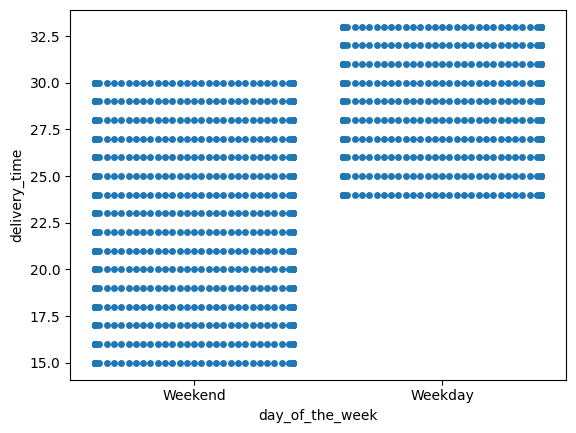

In [ ]:
sns.swarmplot(x=df['day_of_the_week'], y=df['delivery_time'])
plt.show()

#### Observations:

 the weekend delivery time is slower. Maybe more drivers on the weekend vs weekday. maybe this gig is a part-time job for workers who are commited during the weekdays.

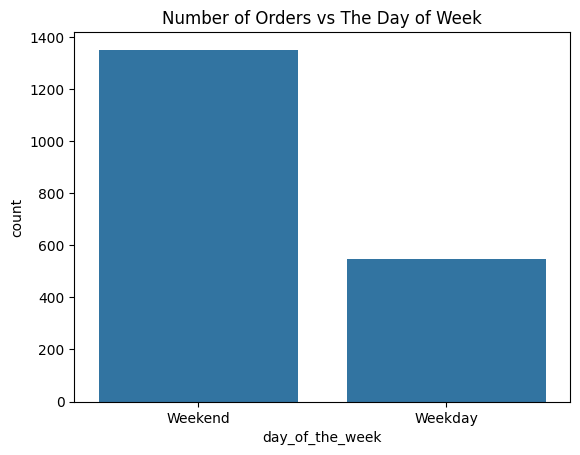

In [ ]:
sns.countplot(x=df['day_of_the_week']).set_title('Number of Orders vs The Day of Week')
plt.show()

In [ ]:
df['day_of_the_week'].value_counts()

,day_of_the_week
Weekend,1351
Weekday,547


In [ ]:
print(f'The percentage of orders on the weekend is {1351/1898*100}')
print(f'The percentage of orders on the weekday is {547/1898*100}')

The percentage of orders on the weekend is 71.18018967334035
The percentage of orders on the weekday is 28.81981032665964


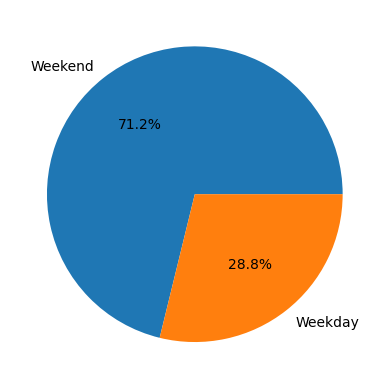

In [ ]:
plt.pie(x=[1351,547], labels=['Weekend', 'Weekday'], autopct='%1.1f%%')
plt.show()

#### Observations:

More orders on the weekend.

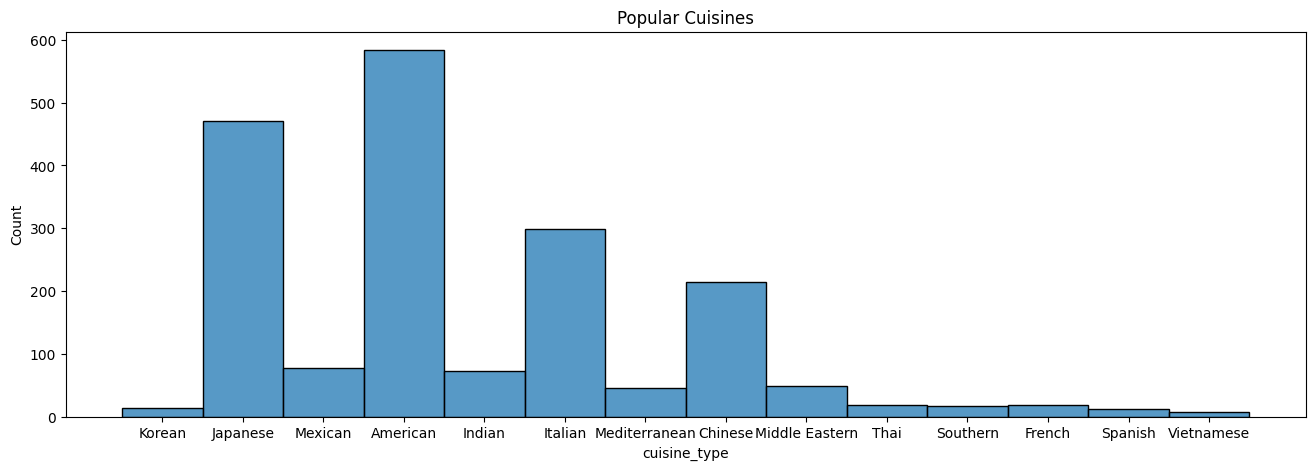

In [ ]:
sns.histplot(df['cuisine_type']).set_title('Popular Cuisines').figure.set_size_inches(16,5)
plt.show()

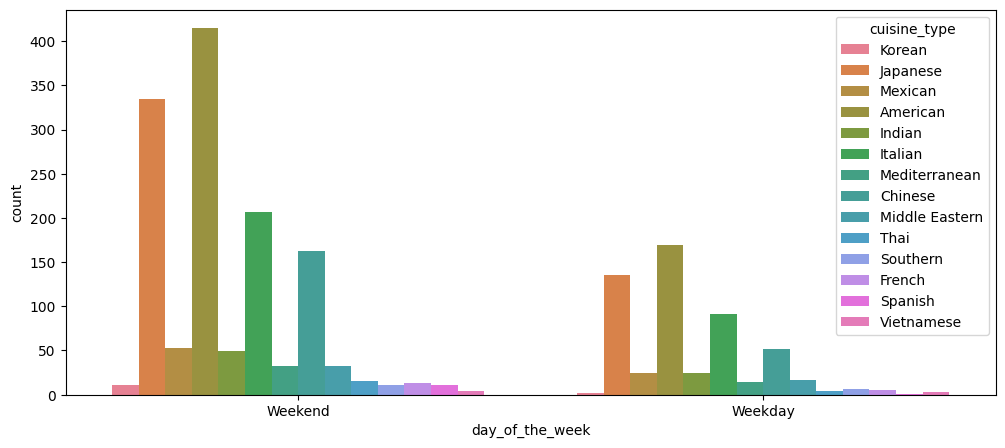

In [ ]:
sns.countplot(x='day_of_the_week', hue='cuisine_type', data=df).figure.set_size_inches(12,5)
plt.show()

#### Observations:

*   There are 4 popular cuisines: American, Japanese, Italian, and Chinese.


*   American cuisine is the most popular.



*   The least popular cuisine is different based on the day of the week. For the weekend, it is vietnamese but for the weekday, it is the spanish cuisine.



In [ ]:
df.restaurant_name.value_counts()

,restaurant_name
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68
...,...
Sushi Choshi,1
Dos Caminos Soho,1
La Follia,1
Philippe Chow,1


In [ ]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df[df['restaurant_name'] == 'Shake Shack']['rating'].mean()

4.2781954887218046

#### Observations:
The most popular resturant is Shake Shack with average rate of 4.28.

In [ ]:
weekend_missing_rating = df[(df['rating'].isnull())&(df['day_of_the_week']=='Weekend')].shape[0]
weekday_missing_rating = df[(df['rating'].isnull())&(df['day_of_the_week']=='Weekday')].shape[0]
print(f'Numbers of orders on the weekend that have not been given a rating: {weekend_missing_rating}')
print(f'Numbers of orders on the weekday that have Not been given a rating: {weekday_missing_rating}')

Numbers of orders on the weekend that have not been given a rating: 529
Numbers of orders on the weekday that have Not been given a rating: 207


In [ ]:
weekend_rating = df[(df['rating'].notna())&(df['day_of_the_week']=='Weekend')].shape[0]
weekday_rating = df[(df['rating'].notna())&(df['day_of_the_week']=='Weekday')].shape[0]
print(f'Numbers of orders on the weekend that have been given a rating: {weekend_rating}')
print(f'Numbers of orders on the weekday that have been given a rating: {weekday_rating}')

Numbers of orders on the weekend that have been given a rating: 822
Numbers of orders on the weekday that have been given a rating: 340


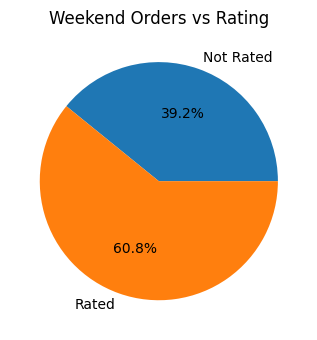

In [ ]:
plt.pie(x=[weekend_missing_rating, weekend_rating], labels=['Not Rated', 'Rated'], autopct='%1.1f%%')
plt.title('Weekend Orders vs Rating')
plt.show()

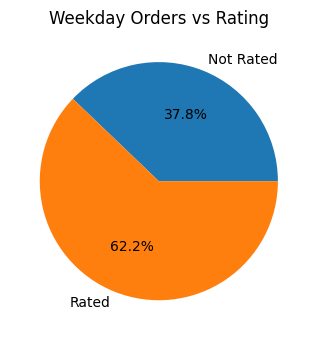

In [ ]:
plt.pie(x=[weekday_missing_rating, weekday_rating], labels=['Not Rated', 'Rated'], autopct='%1.1f%%')
plt.title('Weekday Orders vs Rating')
plt.show()

#### Observations:
The not rated orders are close to 40% for all days.

In [ ]:
repeated_customers = df[df['customer_id'].duplicated(keep=False)]['customer_id'].value_counts()
repeated_customers

,count
customer_id,
52832,13
47440,10
83287,9
250494,8
82041,7
...,...
91958,2
268365,2
203370,2


In [ ]:
print(f'The percentage of repeated customers is: {416/1898*100}')
print(f'The percentage of new customers is: {(1898-416)/1898*100}')

The percentage of repeated customers is: 21.91780821917808
The percentage of new customers is: 78.08219178082192


In [ ]:
rc= repeated_customers.value_counts().sum()
nc = 1898-rc
print(f'The number of repeated customers is {rc} and the number of new customers is {nc}')

The number of repeated customers is 416 and the number of new customers is 1482


([<matplotlib.patches.Wedge at 0x7a7a835a1cf0>,
 [Text(0.8493722465349882, 0.6989755266217176, 'Repeated Customers'),
  Text(-0.8493722465349883, -0.6989755266217175, 'New Customers')],
 [Text(0.46329395265544804, 0.38125937815730043, '21.9%'),
  Text(-0.46329395265544815, -0.3812593781573004, '78.1%')])

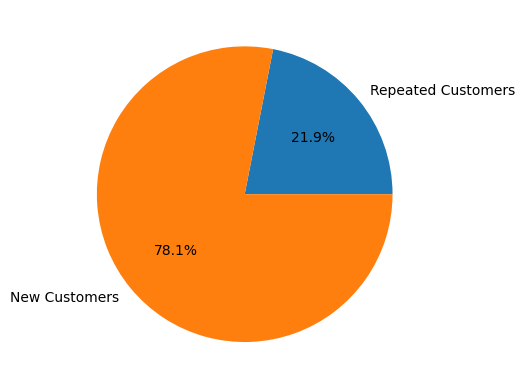

In [ ]:
plt.pie([rc,nc], labels=['Repeated Customers', 'New Customers'], autopct='%1.1f%%')

#### Observations:
There are a lot of new customers who are trying the service comparing to the repeating customers.

### Finding the top 5 restaurants in terms of the number of orders received

In [ ]:
df['restaurant_name'].value_counts().head()

,restaurant_name
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:
The top 5 restaurants:

1.   Shake Shack
2.   The Meatball Shop
3.   Blue Ribbon Sushi
4.   Blue Ribbon Fried Chicken
5.   Parm



### Finding the most popular cuisine on weekends

In [ ]:
df[(df['day_of_the_week']=='Weekend')]['cuisine_type'].value_counts()

,count
cuisine_type,
American,415
Japanese,335
Italian,207
Chinese,163
Mexican,53
Indian,49
Mediterranean,32
Middle Eastern,32
Thai,15


#### Observations:
American cuisine is the most popular on the weekend.

### finding the percentage of the orders cost more than 20 dollars

In [ ]:
high_cost_orders= df[df['cost_of_the_order']>20].shape[0]
total_orders = df.shape[0]
print(f'The percentage of orders that cost more than 20 dollars is {high_cost_orders/total_orders*100}')

The percentage of orders that cost more than 20 dollars is 29.24130663856691


#### Observations:
The percentage of the orders cost more than 20 dollars is 29.24%

### finding the mean order delivery time

In [ ]:
df.delivery_time.mean()

24.161749209694417

#### Observations:
the mean order delivery time is 24.16



### Assuming the company has decided to give 20% discount vouchers to the top 3 most frequent customers. Finding the IDs ofthese customers and the number of orders they placed.

In [ ]:
df['customer_id'].value_counts().head(3)

,count
customer_id,
52832,13
47440,10
83287,9


#### Observations:
The top 3 frequent customers are:  and the number of orders they placed.

1.   52832 who placed 13 orders
2.   47440 who placed 10 orders
3. 83287 who placed 9 orders



### Multivariate Analysis

### Performing a multivariate analysis to explore relationships between the important variables in the dataset.


In [ ]:
mean_values = df.groupby('cuisine_type')['cost_of_the_order'].mean().values
mean_values

array([16.31982877, 16.3052093 , 19.79388889, 16.91972603, 16.41869128,
       16.30453191, 14.00153846, 15.47478261, 16.93311688, 18.82061224,
       19.30058824, 18.99416667, 19.20789474, 12.88285714])

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 79.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 22.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 82.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 19.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 70.1% of the points cannot be plac

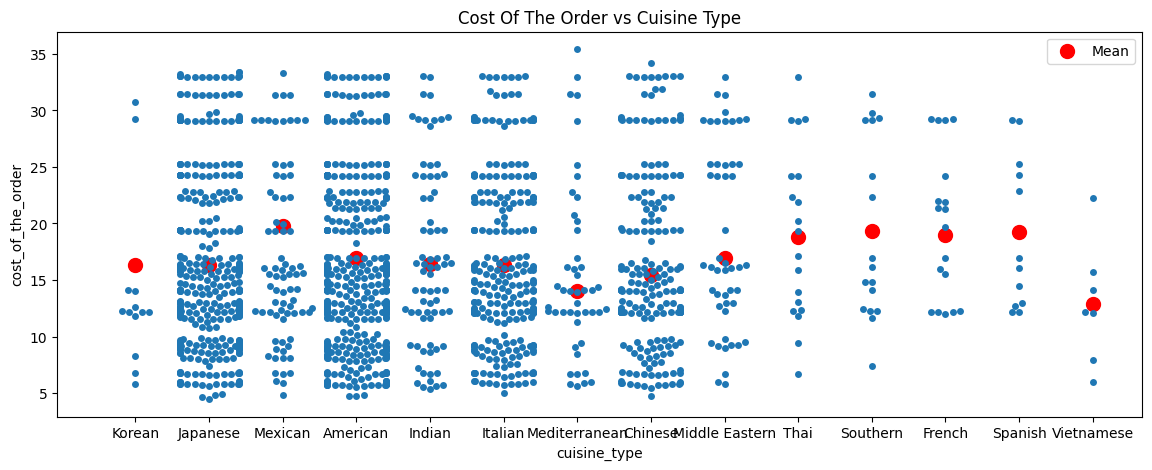

In [ ]:
sns.swarmplot(y='cost_of_the_order', x='cuisine_type', data=df).set_title('Cost Of The Order vs Cuisine Type').figure.set_size_inches(14, 5)
plt.scatter(range(len(mean_values)), mean_values, color='red', s=100, label='Mean')
plt.legend()
plt.show()

#### Observations:
The top 4 cuisines: American, Japanese, Italian, Chinese. There is a common average price between the top 4 cuisines: about 16.

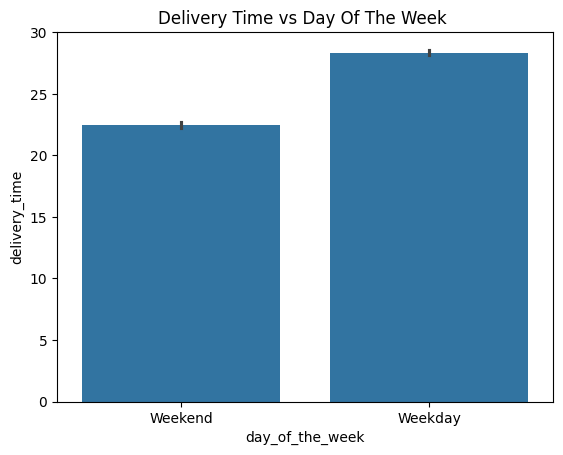

In [ ]:
sns.barplot(y='delivery_time', x='day_of_the_week', data=df).set_title('Delivery Time vs Day Of The Week ')
plt.show()

#### Observations:
The delivery time is faster on the weekend.

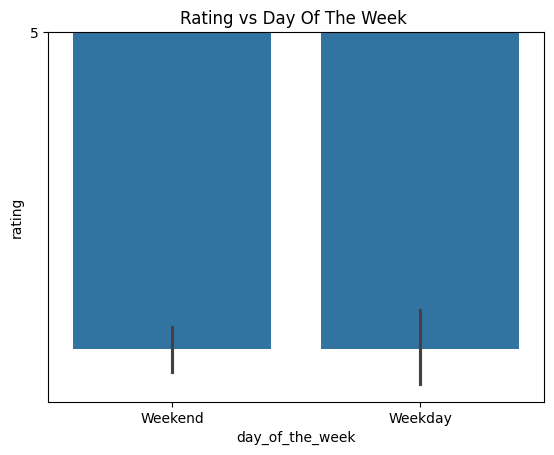

In [ ]:
sns.barplot(y='rating', x='day_of_the_week', data=df).set_title('Rating vs Day Of The Week ')
plt.show()

#### Observations:
this graph show the rating is almost identical. Both Weekday and Weekend have a median of 5 no matter what day it is.

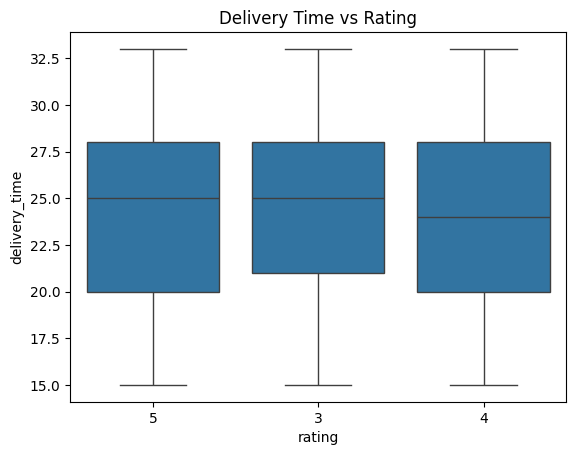

In [ ]:
sns.boxplot(x='rating', y='delivery_time', data=df).set_title('Delivery Time vs Rating')
plt.show()

#### Observations:
the box for 3,4, and 5 rating is having a simalr median which means the rating is not affected by the delivery time. it also shows that the delivery time is consistant.

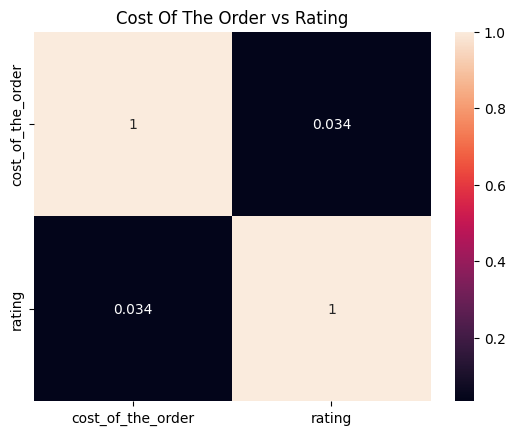

In [ ]:
corr_matrix = df[['cost_of_the_order', 'rating']].corr()
sns.heatmap(corr_matrix, annot=True).set_title('Cost Of The Order vs Rating')
plt.show()

 #### Observations:
 The correlation coefficient between cost of the order and rating is 0.034. This also means the change of the cost of the order has very little if any effect on the rating.

### Assuming that the company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. I'd like to analyze the restaurants fulfilling the criteria to get the promotional offer.

In [ ]:
most_rated = df[df['rating'].notna()].groupby('restaurant_name')['rating'].count()
top_rating_count = most_rated[most_rated>50]
top_rating_count

,rating
restaurant_name,
Blue Ribbon Fried Chicken,64
Blue Ribbon Sushi,73
Shake Shack,133
The Meatball Shop,84


In [ ]:
five_stars = df[df['rating'] == 5]
five_stars

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28
8,1477174,121706,Anjappar Chettinad,Indian,16.44,Weekday,5.0,21,26
9,1477311,39705,Bukhara Grill,Indian,7.18,Weekday,5.0,29,26
11,1478437,221206,Empanada Mama (closed),Mexican,8.10,Weekend,5.0,23,22
12,1476966,129969,Blue Ribbon Fried Chicken,American,24.30,Weekend,5.0,23,17
...,...,...,...,...,...,...,...,...,...
1888,1477353,106324,The Meatball Shop,Italian,16.20,Weekend,5.0,21,26
1890,1477316,164776,TAO,Japanese,15.67,Weekend,5.0,20,22
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5.0,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5.0,31,19


In [ ]:
for restaurant in five_stars['restaurant_name']:
  if restaurant in top_rating_count:
    print(restaurant)

Blue Ribbon Fried Chicken
Shake Shack
Shake Shack
The Meatball Shop
The Meatball Shop
Blue Ribbon Fried Chicken
Shake Shack
Shake Shack
Blue Ribbon Sushi
Blue Ribbon Sushi
Blue Ribbon Fried Chicken
The Meatball Shop
The Meatball Shop
Shake Shack
The Meatball Shop
Blue Ribbon Fried Chicken
Shake Shack
Blue Ribbon Fried Chicken
The Meatball Shop
The Meatball Shop
The Meatball Shop
Shake Shack
The Meatball Shop
Shake Shack
The Meatball Shop
Shake Shack
Shake Shack
Blue Ribbon Fried Chicken
Blue Ribbon Fried Chicken
Shake Shack
Shake Shack
The Meatball Shop
Blue Ribbon Fried Chicken
The Meatball Shop
Blue Ribbon Fried Chicken
Blue Ribbon Sushi
Blue Ribbon Fried Chicken
The Meatball Shop
The Meatball Shop
The Meatball Shop
Shake Shack
Shake Shack
Shake Shack
The Meatball Shop
The Meatball Shop
The Meatball Shop
Blue Ribbon Fried Chicken
The Meatball Shop
Blue Ribbon Sushi
Shake Shack
The Meatball Shop
Shake Shack
Shake Shack
Shake Shack
Blue Ribbon Sushi
Shake Shack
Blue Ribbon Sushi
Blue R

#### Observations:
The restaurants that are fulfilling the criteria to get the promotional offer:
Blue Ribbon Fried Chicken,
Blue Ribbon Sushi,
Shake Shack, and
The Meatball Shop.



### if the company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Id like to chwck for the net revenue generated by the company across all orders.

In [ ]:
def net_revenue(row):
  if row['cost_of_the_order'] > 20:
    return row['cost_of_the_order']-(row['cost_of_the_order']*0.25)
  elif row['cost_of_the_order'] > 5:
    return row['cost_of_the_order']-(row['cost_of_the_order']*0.15)
  else:
    return 0
df['net_revenue'] = df.apply(net_revenue, axis=1)

In [ ]:
revenue_data = df[['cost_of_the_order', 'net_revenue']]
revenue_data

,cost_of_the_order,net_revenue
0,30.75,23.0625
1,12.08,10.2680
2,12.23,10.3955
3,29.20,21.9000
4,11.59,9.8515
...,...,...
1893,22.31,16.7325
1894,12.18,10.3530
1895,25.22,18.9150
1896,12.18,10.3530


#### Observations:
the company takes more when the cost of the order is high.

### if the company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)

In [ ]:
df['total_time'] = df['food_preparation_time']+df['delivery_time']
time_over_60 = df[df['total_time']>60]
print(f"Percentage of orders taking more than 60 minutes: {((len(time_over_60) / len(df)) * 100):.2f}%")


Percentage of orders taking more than 60 minutes: 10.54%


#### Observations:
Percentage of orders taking more than 60 minutes: 10.54%. This indicates that most of the orders have been prepared and then delivered in less than 60 minutes.


### if the company wants to analyze the delivery time of the orders on weekdays and weekends. I'd like to check how the mean delivery time does vary during weekdays and weekends

In [ ]:
df.groupby('day_of_the_week')['delivery_time'].mean()

,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


#### Observations:
orders delivered slower on the weekday comparing to the weekend. This could be due to more drivers are available during the weekend.

### Conclusion and Recommendations

### Conclusions:
*  The top popular cuisine is American


*   Missing rating is close to 40% of the total orders.


*   new cutomers percentage is much higher than returning customers.
*   number of orders on weekday is less than weekend


*   The average cost per order among the top 4 cuisines is around $16








### Recommendations:

*  I highly recommend partnering up with more American resturants as they are the most popular cuisines among other types of cuisines.

*   Encourage ratings by having more questionaires or surveys. Having promotions for submitting a rating is also helpful
*   The returend customers need more attention compared to new customers. I highly recommend giving a discount code after a certain number of order purchase, or create points and ranking system to encourage frequent orders.


*   I highly recommend running a promo during the weekdays to increase sales.
*   List item





---